# Breast Cancer Classification
## ETL
According to the American Cancer Society (ACS), breast cancer is the most common cancer in American women, except for skin cancers.  Today, a woman’s chance of getting breast cancer is 1 in 8 chance. The chance that a woman will die from breast cancer is about 2.6%, or a 1 in 38 chance. Breast cancer still causes about 685.000 deaths annually in the world. Breast cancer research opens the door to finding better ways to prevent, detect, and treat breast cancer.<br>
Early detection, often through screening (mammogram, breast ultrasound, MRI), can catch the disease when it is most treatable.  Its detection ability depends on tumor size and breast tissue density. 

The goal is to classify tumors as malignant (cancerous) or benign (non cancerous).

Breast Cancer Wisconsin (Diagnostic) Dataset is taken from https://www.kaggle.com/yasserh/breast-cancer-dataset. The dataset contains a description and size of specific cells in the breast with diagnosis.

**Importance of Cleaning data**:<br>
During the cleaning we found and fix incorrect data (remove duplicates and irrelevant data, handle missing data, fix structural errors, filter outliers, etc.). As a result we get more performed, manageable  data and finally we can understand if our data make sense and helps to answer to our question. In my project if we could to define malignant/benign cells based on tumor size and breast tissue density. Despite on data cleaning takes most of the model process  time this process is priceless because it increases overall productivity.

#### Required steps
- breast-cancer.csv should be downloaded from https://www.kaggle.com/yasserh/breast-cancer-dataset
- use Python 3.7
- virtual environment contains:
    - pandas==1.0.5
    - numpy==1.19.2
    - matplotlib==3.2.2
    - seaborn==0.10.8
    - imbalanced-learn==0.7.0
    - sklearn==0.23.2
    - tensorflow==2.4.4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
source_df = pd.read_csv('breast-cancer.csv')  # for local notebook

In [4]:
# shapre of source file
print('Shape:',source_df.shape)
print('Columns:', source_df.columns)

Shape: (569, 32)
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Features


#### Check missing values
The source file does not contain missing values and datatyoes match features contain.

In [5]:
# check datatypes of columns and nan values
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Duplicates
Dataset does not contain duplicates

In [5]:
source_df.duplicated().sum()

0

#### Exclude id from the list of features
We do not need id as feature for future investigation, so we drop this column. As a result we have 569 rows with 31 columns.

In [7]:
source_df.drop(['id'], axis=1, inplace=True)

#### Value range and distribution of features
The value distribution of each feature make sense. 

In [8]:
source_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


All columns do not have null values and data types of colums match their contain. <br>
We do not need id as feature for future investigation,, so we drop this column. As a result we have 569 rows with 31 columns. <br>
Also all features are numerical.

In [27]:
# 1st columns is target
features = source_df.columns[1:]
len(features)

30

#### Outliers
We discovered some outliers which will be updated by using Inter Quantile Range technique. Also even after updating Outliers some featiures have skewed dictributions. Durinf Feature Creation phase we will normolize features.

_Possible techniques_:<br>
Detecting Outliers:
- boxplot
- z-score
- Inter Quantile Range (IQR)

Handling Outliers:
- Trimming/Remove outliers
- Quantile based flooring and capping
- Mean/Median imputation (replace outliers by median/mean)


*** radius_mean ***
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64


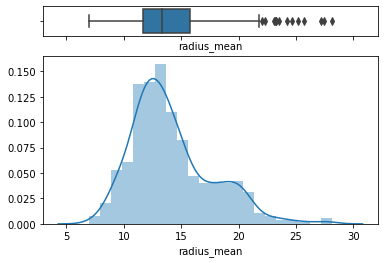

<Figure size 7200x3600 with 0 Axes>

*** texture_mean ***
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64


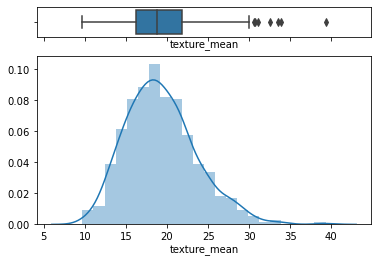

<Figure size 7200x3600 with 0 Axes>

*** perimeter_mean ***
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64


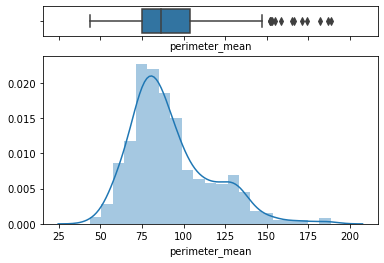

<Figure size 7200x3600 with 0 Axes>

*** area_mean ***
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64


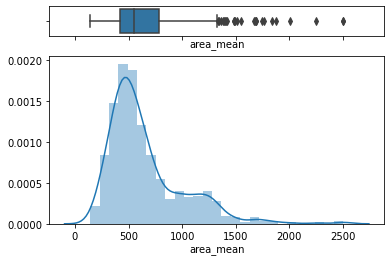

<Figure size 7200x3600 with 0 Axes>

*** smoothness_mean ***
count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64


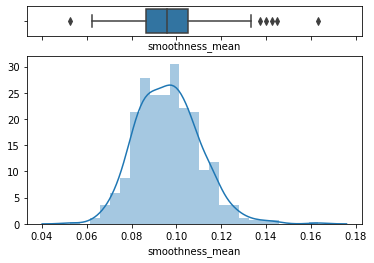

<Figure size 7200x3600 with 0 Axes>

*** compactness_mean ***
count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness_mean, dtype: float64


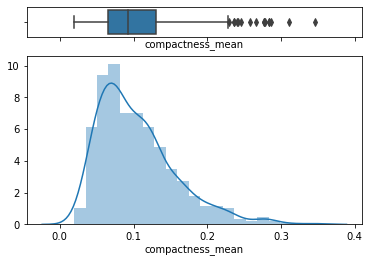

<Figure size 7200x3600 with 0 Axes>

*** concavity_mean ***
count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64


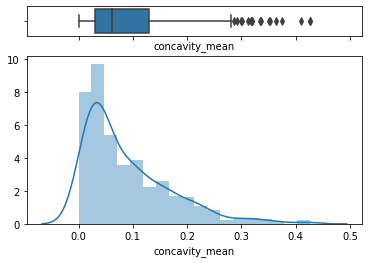

<Figure size 7200x3600 with 0 Axes>

*** concave points_mean ***
count    569.000000
mean       0.048919
std        0.038803
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.201200
Name: concave points_mean, dtype: float64


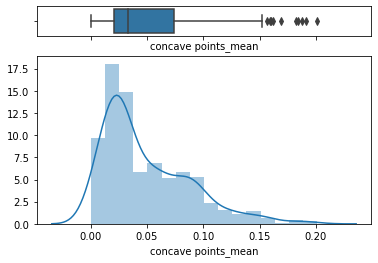

<Figure size 7200x3600 with 0 Axes>

*** symmetry_mean ***
count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry_mean, dtype: float64


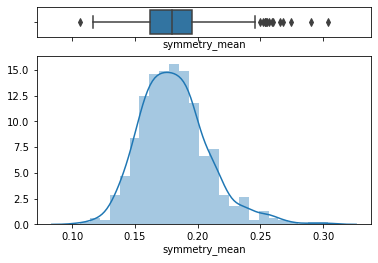

<Figure size 7200x3600 with 0 Axes>

*** fractal_dimension_mean ***
count    569.000000
mean       0.062798
std        0.007060
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.097440
Name: fractal_dimension_mean, dtype: float64


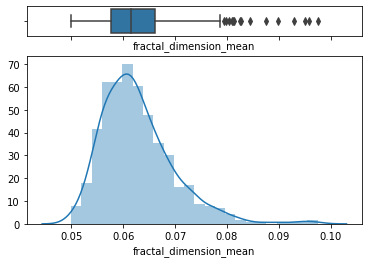

<Figure size 7200x3600 with 0 Axes>

*** radius_se ***
count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius_se, dtype: float64


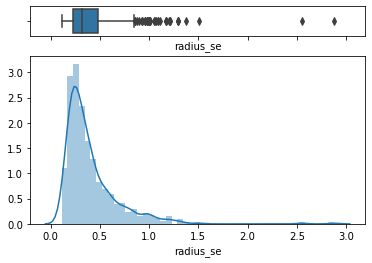

<Figure size 7200x3600 with 0 Axes>

*** texture_se ***
count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture_se, dtype: float64


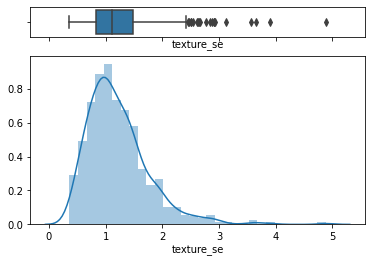

<Figure size 7200x3600 with 0 Axes>

*** perimeter_se ***
count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter_se, dtype: float64


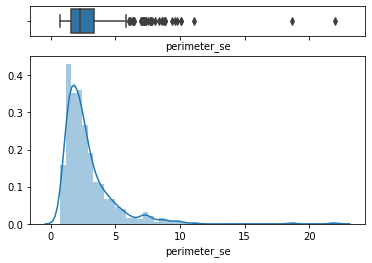

<Figure size 7200x3600 with 0 Axes>

*** area_se ***
count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area_se, dtype: float64


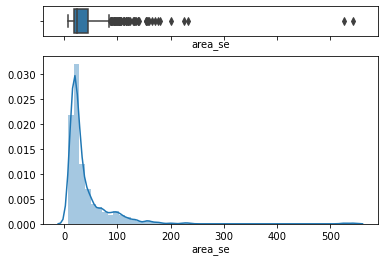

<Figure size 7200x3600 with 0 Axes>

*** smoothness_se ***
count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_se, dtype: float64


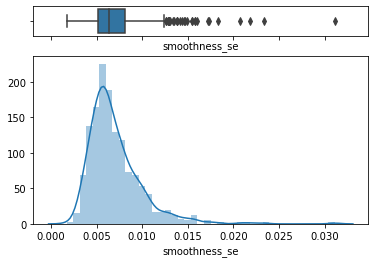

<Figure size 7200x3600 with 0 Axes>

*** compactness_se ***
count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness_se, dtype: float64


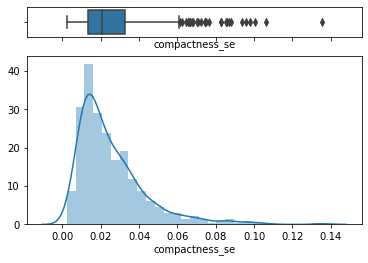

<Figure size 7200x3600 with 0 Axes>

*** concavity_se ***
count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Name: concavity_se, dtype: float64


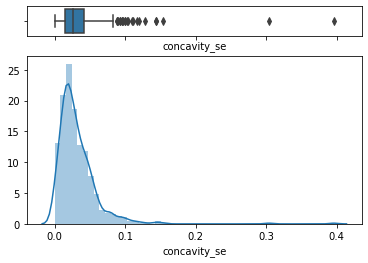

<Figure size 7200x3600 with 0 Axes>

*** concave points_se ***
count    569.000000
mean       0.011796
std        0.006170
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.052790
Name: concave points_se, dtype: float64


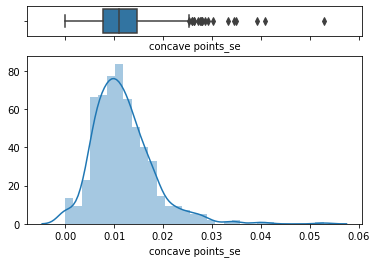

<Figure size 7200x3600 with 0 Axes>

*** symmetry_se ***
count    569.000000
mean       0.020542
std        0.008266
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.078950
Name: symmetry_se, dtype: float64


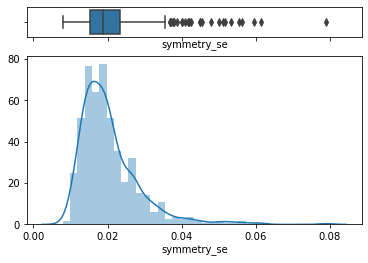

<Figure size 7200x3600 with 0 Axes>

*** fractal_dimension_se ***
count    569.000000
mean       0.003795
std        0.002646
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.029840
Name: fractal_dimension_se, dtype: float64


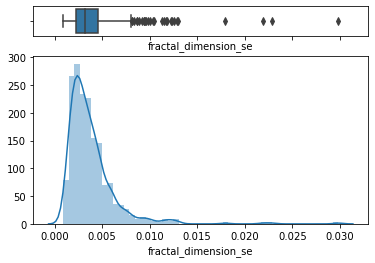

<Figure size 7200x3600 with 0 Axes>

*** radius_worst ***
count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius_worst, dtype: float64


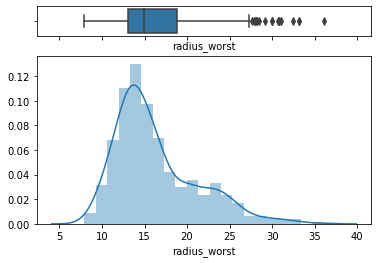

<Figure size 7200x3600 with 0 Axes>

*** texture_worst ***
count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: texture_worst, dtype: float64


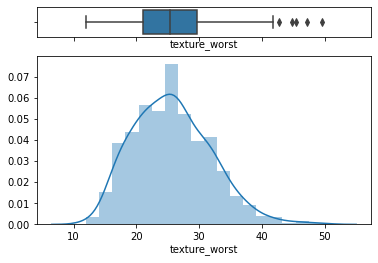

<Figure size 7200x3600 with 0 Axes>

*** perimeter_worst ***
count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: perimeter_worst, dtype: float64


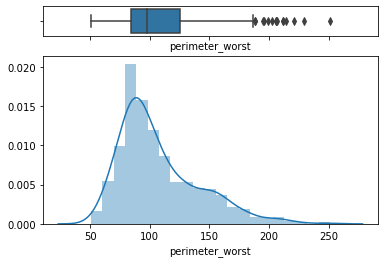

<Figure size 7200x3600 with 0 Axes>

*** area_worst ***
count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area_worst, dtype: float64


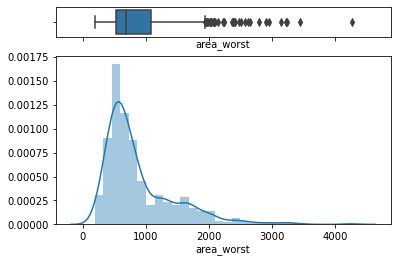

<Figure size 7200x3600 with 0 Axes>

*** smoothness_worst ***
count    569.000000
mean       0.132369
std        0.022832
min        0.071170
25%        0.116600
50%        0.131300
75%        0.146000
max        0.222600
Name: smoothness_worst, dtype: float64


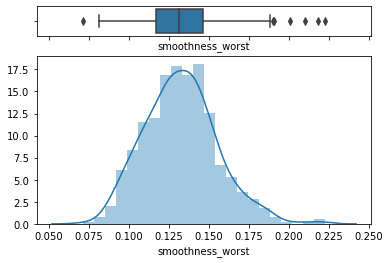

<Figure size 7200x3600 with 0 Axes>

*** compactness_worst ***
count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: compactness_worst, dtype: float64


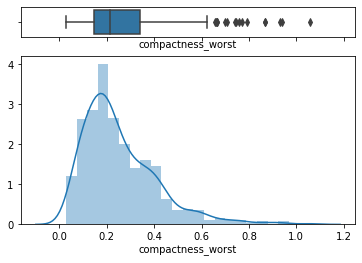

<Figure size 7200x3600 with 0 Axes>

*** concavity_worst ***
count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: concavity_worst, dtype: float64


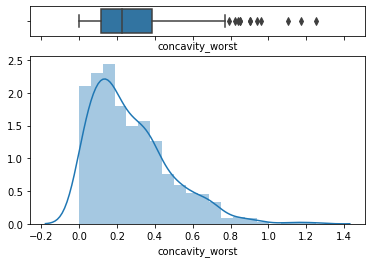

<Figure size 7200x3600 with 0 Axes>

*** concave points_worst ***
count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave points_worst, dtype: float64


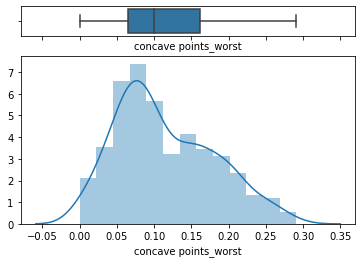

<Figure size 7200x3600 with 0 Axes>

*** symmetry_worst ***
count    569.000000
mean       0.290076
std        0.061867
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.663800
Name: symmetry_worst, dtype: float64


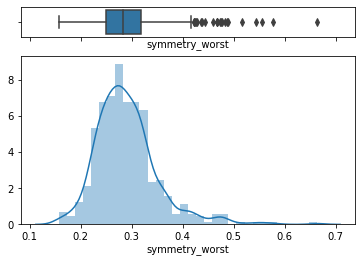

<Figure size 7200x3600 with 0 Axes>

*** fractal_dimension_worst ***
count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension_worst, dtype: float64


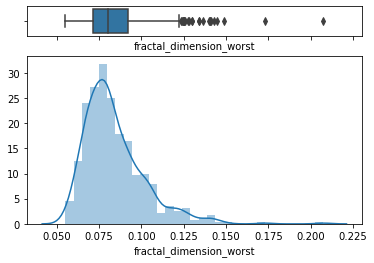

<Figure size 7200x3600 with 0 Axes>

In [28]:
for feature in features:
    print('*** {0} ***'.format(feature))
    print(source_df[feature].describe())
    fig, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    plt.figure(figsize=(100,50))
    sns.boxplot(source_df[feature], ax= ax_box)
    sns.distplot(source_df[feature], ax=ax_dist )
    plt.show()

In [12]:
def detect_outliers(col):
    
    percentile_25=col.quantile(0.25)
    percentile_75=col.quantile(0.75)

    IQR = percentile_75-percentile_25
    upper_limit=percentile_75+1.5*IQR
    lower_limit=percentile_25-1.5*IQR
    print(upper_limit, lower_limit)
    return col[(col < lower_limit) | (col > upper_limit)]

In [14]:
#test
detect_outliers(source_df['smoothness_worst'])

0.1901 0.07250000000000001


3      0.20980
41     0.19090
192    0.07117
203    0.22260
379    0.21840
504    0.19020
505    0.20060
Name: smoothness_worst, dtype: float64

In [34]:
def replace_outliers(col):
#     #the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
#     percentile_10=col.quantile(0.1)
#     percentile_90=col.quantile(0.9)
#     print(percentile_10, percentile_90)
    
#     col = np.where(col < percentile_10, percentile_10, col)
#     col = np.where(col > percentile_90, percentile_90, col)
    percentile_25=col.quantile(0.25)
    percentile_75=col.quantile(0.75)

    IQR = percentile_75-percentile_25
    upper_limit=percentile_75+1.5*IQR
    lower_limit=percentile_25-1.5*IQR
    print('upper_limit: {0}, lower_limit {1}'.format(upper_limit, lower_limit))
    col = np.where(col < lower_limit, lower_limit, col)
    col = np.where(col > upper_limit, upper_limit, col)

    return col

In [35]:
#test
print(replace_outliers(source_df['smoothness_worst'])[3]) # to upper_level
print(replace_outliers(source_df['smoothness_worst'])[192]) #to lower_level

upper_limit: 0.1901, lower_limit 0.07250000000000001
0.1901
upper_limit: 0.1901, lower_limit 0.07250000000000001
0.07250000000000001


*** radius_mean ***
upper_limit: 21.9, lower_limit 5.579999999999999
count    569.000000
mean      14.062916
std        3.340025
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       21.900000
Name: radius_mean, dtype: float64


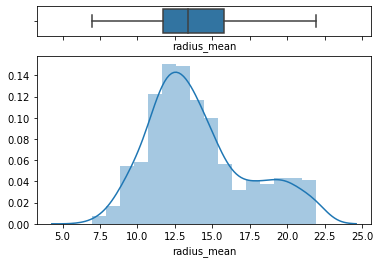

<Figure size 7200x3600 with 0 Axes>

*** texture_mean ***
upper_limit: 30.244999999999997, lower_limit 7.725000000000003
count    569.000000
mean      19.254736
std        4.187510
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       30.245000
Name: texture_mean, dtype: float64


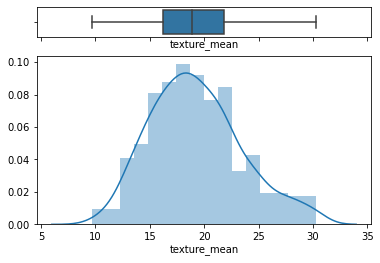

<Figure size 7200x3600 with 0 Axes>

*** perimeter_mean ***
upper_limit: 147.49499999999998, lower_limit 31.775000000000013
count    569.000000
mean      91.543787
std       23.047218
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      147.495000
Name: perimeter_mean, dtype: float64


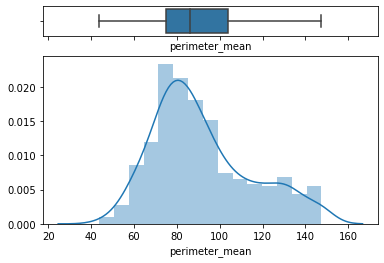

<Figure size 7200x3600 with 0 Axes>

*** area_mean ***
upper_limit: 1326.3000000000002, lower_limit -123.30000000000001
count     569.000000
mean      639.765202
std       305.343508
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      1326.300000
Name: area_mean, dtype: float64


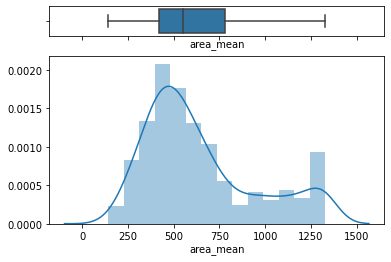

<Figure size 7200x3600 with 0 Axes>

*** smoothness_mean ***
upper_limit: 0.133695, lower_limit 0.057975
count    569.000000
mean       0.096266
std        0.013685
min        0.057975
25%        0.086370
50%        0.095870
75%        0.105300
max        0.133695
Name: smoothness_mean, dtype: float64


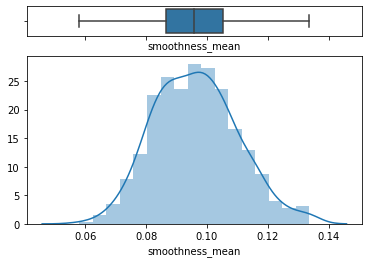

<Figure size 7200x3600 with 0 Axes>

*** compactness_mean ***
upper_limit: 0.22861999999999996, lower_limit -0.03329999999999997
count    569.000000
mean       0.103222
std        0.049386
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.228620
Name: compactness_mean, dtype: float64


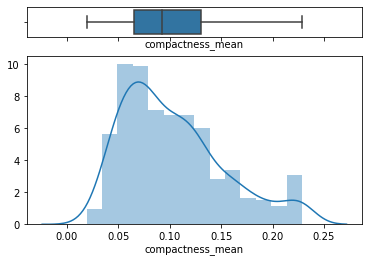

<Figure size 7200x3600 with 0 Axes>

*** concavity_mean ***
upper_limit: 0.28241000000000005, lower_limit -0.12215000000000001
count    569.000000
mean       0.086937
std        0.073900
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.282410
Name: concavity_mean, dtype: float64


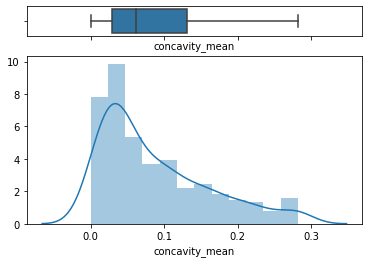

<Figure size 7200x3600 with 0 Axes>

*** concave points_mean ***
upper_limit: 0.15453500000000003, lower_limit -0.06022500000000003
count    569.000000
mean       0.048552
std        0.037633
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.154535
Name: concave points_mean, dtype: float64


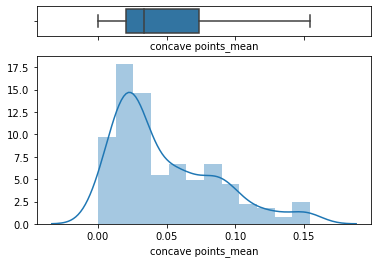

<Figure size 7200x3600 with 0 Axes>

*** symmetry_mean ***
upper_limit: 0.24640000000000006, lower_limit 0.11119999999999995
count    569.000000
mean       0.180734
std        0.026067
min        0.111200
25%        0.161900
50%        0.179200
75%        0.195700
max        0.246400
Name: symmetry_mean, dtype: float64


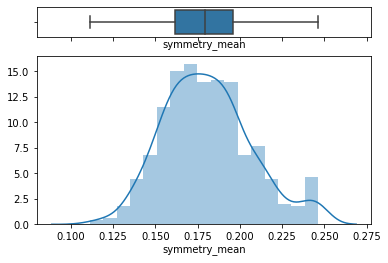

<Figure size 7200x3600 with 0 Axes>

*** fractal_dimension_mean ***
upper_limit: 0.07874999999999999, lower_limit 0.045070000000000006
count    569.000000
mean       0.062604
std        0.006418
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.078750
Name: fractal_dimension_mean, dtype: float64


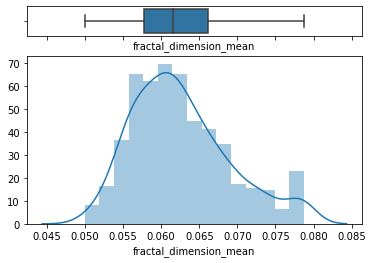

<Figure size 7200x3600 with 0 Axes>

*** radius_se ***
upper_limit: 0.84865, lower_limit -0.13735000000000003
count    569.000000
mean       0.384698
std        0.203612
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        0.848650
Name: radius_se, dtype: float64


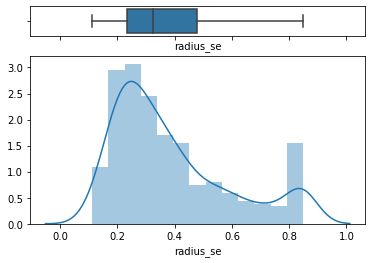

<Figure size 7200x3600 with 0 Axes>

*** texture_se ***
upper_limit: 2.43415, lower_limit -0.12625000000000008
count    569.000000
mean       1.198057
std        0.485500
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        2.434150
Name: texture_se, dtype: float64


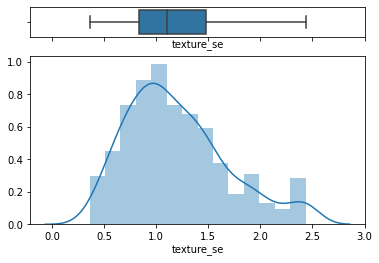

<Figure size 7200x3600 with 0 Axes>

*** perimeter_se ***
upper_limit: 5.983499999999999, lower_limit -1.0205000000000002
count    569.000000
mean       2.699075
std        1.402982
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max        5.983500
Name: perimeter_se, dtype: float64


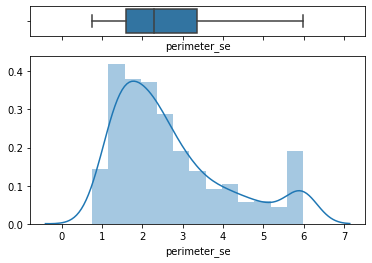

<Figure size 7200x3600 with 0 Axes>

*** area_se ***
upper_limit: 86.19999999999999, lower_limit -23.15999999999999
count    569.000000
mean      34.959487
std       24.294515
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max       86.200000
Name: area_se, dtype: float64


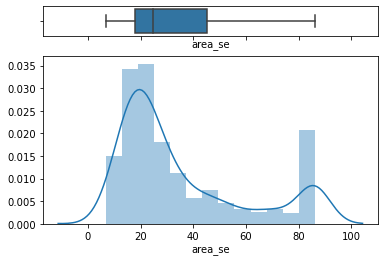

<Figure size 7200x3600 with 0 Axes>

*** smoothness_se ***
upper_limit: 0.012611499999999998, lower_limit 0.0007035000000000019
count    569.000000
mean       0.006876
std        0.002410
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.012611
Name: smoothness_se, dtype: float64


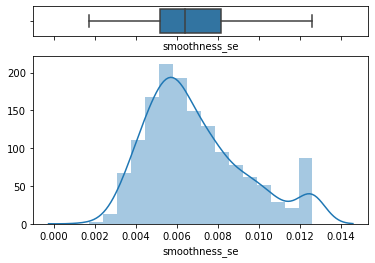

<Figure size 7200x3600 with 0 Axes>

*** compactness_se ***
upper_limit: 0.061505, lower_limit -0.015974999999999996
count    569.000000
mean       0.024561
std        0.014947
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.061505
Name: compactness_se, dtype: float64


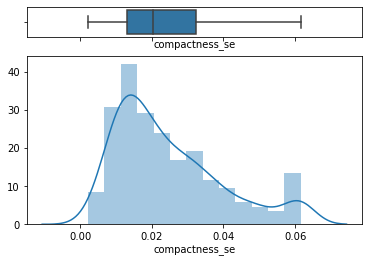

<Figure size 7200x3600 with 0 Axes>

*** concavity_se ***
upper_limit: 0.08249, lower_limit -0.025349999999999998
count    569.000000
mean       0.030038
std        0.020577
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.082490
Name: concavity_se, dtype: float64


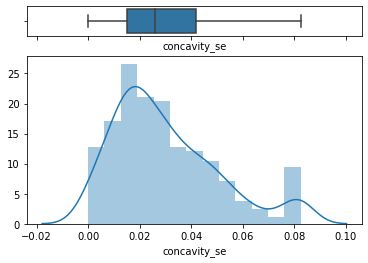

<Figure size 7200x3600 with 0 Axes>

*** concave points_se ***
upper_limit: 0.025318, lower_limit -0.0029699999999999996
count    569.000000
mean       0.011601
std        0.005486
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.025318
Name: concave points_se, dtype: float64


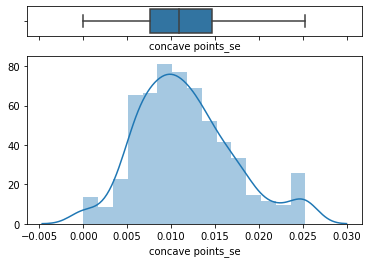

<Figure size 7200x3600 with 0 Axes>

*** symmetry_se ***
upper_limit: 0.035960000000000006, lower_limit 0.0026799999999999984
count    569.000000
mean       0.020047
std        0.006572
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.035960
Name: symmetry_se, dtype: float64


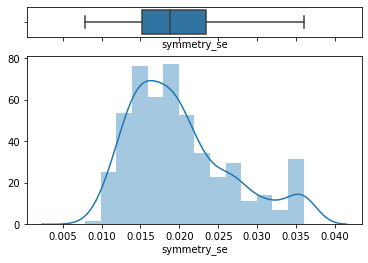

<Figure size 7200x3600 with 0 Axes>

*** fractal_dimension_se ***
upper_limit: 0.008022999999999999, lower_limit -0.0012169999999999993
count    569.000000
mean       0.003591
std        0.001780
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.008023
Name: fractal_dimension_se, dtype: float64


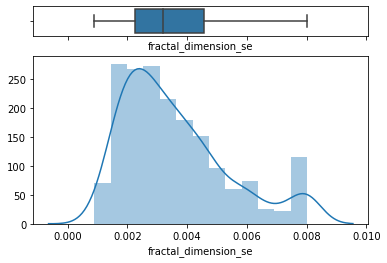

<Figure size 7200x3600 with 0 Axes>

*** radius_worst ***
upper_limit: 27.459999999999997, lower_limit 4.340000000000002
count    569.000000
mean      16.183882
std        4.587249
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       27.460000
Name: radius_worst, dtype: float64


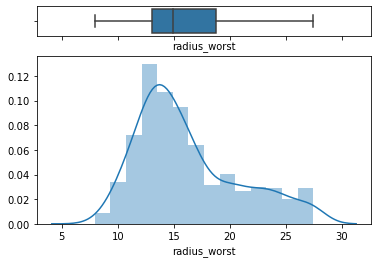

<Figure size 7200x3600 with 0 Axes>

*** texture_worst ***
upper_limit: 42.68, lower_limit 8.119999999999997
count    569.000000
mean      25.648453
std        6.054406
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       42.680000
Name: texture_worst, dtype: float64


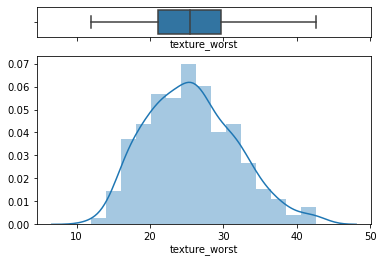

<Figure size 7200x3600 with 0 Axes>

*** perimeter_worst ***
upper_limit: 187.335, lower_limit 22.17499999999999
count    569.000000
mean     106.705369
std       31.957777
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      187.335000
Name: perimeter_worst, dtype: float64


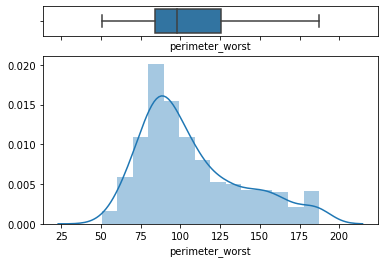

<Figure size 7200x3600 with 0 Axes>

*** area_worst ***
upper_limit: 1937.0500000000002, lower_limit -337.7500000000001
count     569.000000
mean      849.907821
std       475.645240
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      1937.050000
Name: area_worst, dtype: float64


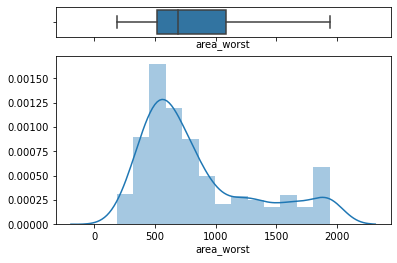

<Figure size 7200x3600 with 0 Axes>

*** smoothness_worst ***
upper_limit: 0.1901, lower_limit 0.07250000000000001
count    569.000000
mean       0.132209
std        0.022320
min        0.072500
25%        0.116600
50%        0.131300
75%        0.146000
max        0.190100
Name: smoothness_worst, dtype: float64


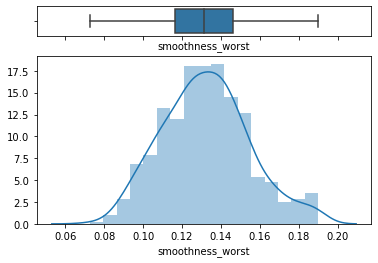

<Figure size 7200x3600 with 0 Axes>

*** compactness_worst ***
upper_limit: 0.6269500000000001, lower_limit -0.14065000000000005
count    569.000000
mean       0.249883
std        0.142851
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        0.626950
Name: compactness_worst, dtype: float64


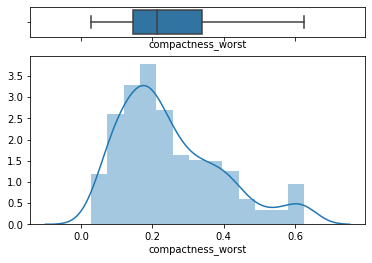

<Figure size 7200x3600 with 0 Axes>

*** concavity_worst ***
upper_limit: 0.7855000000000001, lower_limit -0.2881000000000001
count    569.000000
mean       0.268754
std        0.197461
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        0.785500
Name: concavity_worst, dtype: float64


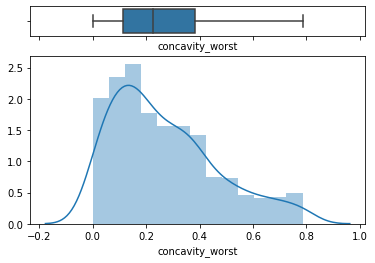

<Figure size 7200x3600 with 0 Axes>

*** concave points_worst ***
upper_limit: 0.30610499999999996, lower_limit -0.07977499999999997
count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave points_worst, dtype: float64


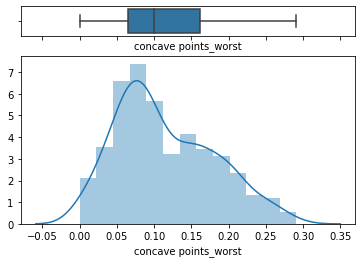

<Figure size 7200x3600 with 0 Axes>

*** symmetry_worst ***
upper_limit: 0.41915, lower_limit 0.14915
count    569.000000
mean       0.287616
std        0.053868
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.419150
Name: symmetry_worst, dtype: float64


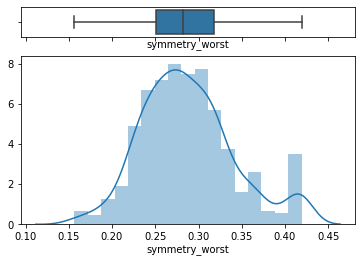

<Figure size 7200x3600 with 0 Axes>

*** fractal_dimension_worst ***
upper_limit: 0.12301, lower_limit 0.04053
count    569.000000
mean       0.083342
std        0.015993
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.123010
Name: fractal_dimension_worst, dtype: float64


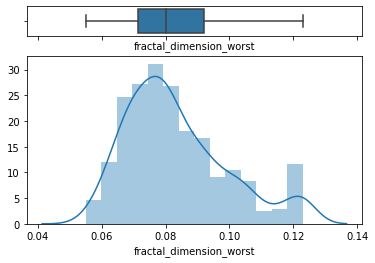

<Figure size 7200x3600 with 0 Axes>

In [36]:
for feature in features:
    print('*** {0} ***'.format(feature))
    source_df[feature] = replace_outliers(source_df[feature])
    

    print(source_df[feature].describe())
    fig, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    plt.figure(figsize=(100,50))
    sns.boxplot(source_df[feature], ax= ax_box)
    sns.distplot(source_df[feature], ax=ax_dist )
    plt.show()

#### Check correlation
In many datasets we find some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increase the computational cost.<br>
We will remove highly correlated features (>0.95) from our dataset during Feature Creation Phase

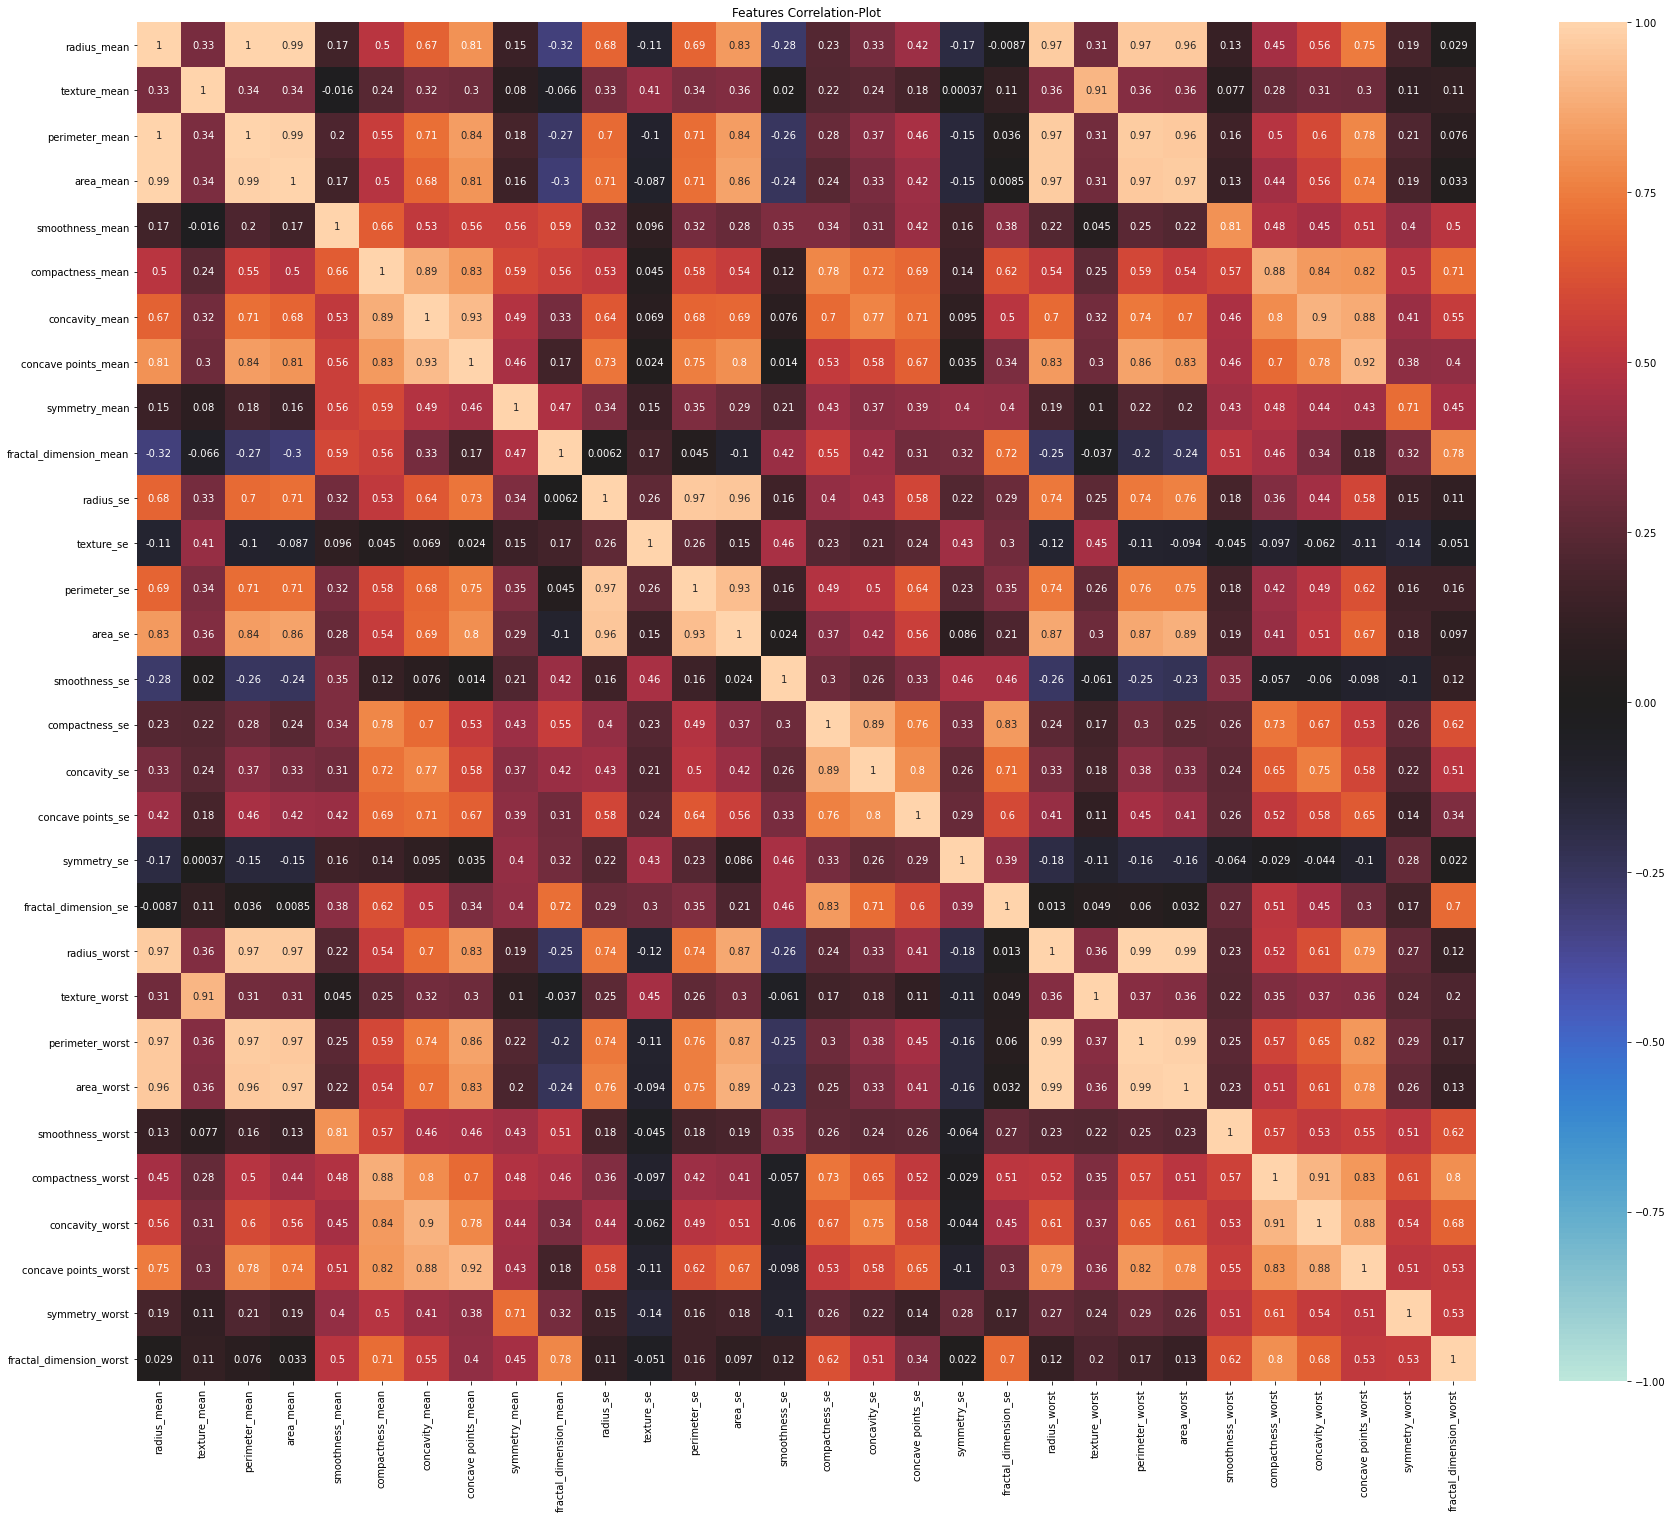

In [19]:
plt.figure(figsize=[30,25])
plt.title('Features Correlation-Plot')
sns.heatmap(source_df[features].corr(), vmin=-1, vmax=1, center=0, annot=True)
plt.show()

In [30]:
#Creating the Correlation matrix and Selecting the Upper trigular matrix
cor_matrix = source_df[features].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [31]:
upper_tri

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.33276,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,0.319056,...,0.973472,0.306225,0.967506,0.962549,0.126332,0.452062,0.559312,0.747817,0.187429,0.028799
texture_mean,NaN,NaN,0.339588,0.341552,0.015997,0.241666,0.318654,0.301509,0.079586,0.065946,...,0.355583,0.911642,0.364127,0.357193,0.077224,0.276731,0.308860,0.296948,0.108611,0.113049
perimeter_mean,NaN,NaN,NaN,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,0.266586,...,0.974555,0.312741,0.973889,0.963900,0.157912,0.496387,0.597326,0.776769,0.212299,0.075825
area_mean,NaN,NaN,NaN,NaN,0.167400,0.498665,0.680126,0.814133,0.155152,0.303524,...,0.973784,0.311537,0.967206,0.973460,0.133605,0.441642,0.556230,0.739618,0.185220,0.033012
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.661938,0.526544,0.560961,0.557597,0.586706,...,0.222464,0.044550,0.246572,0.222205,0.808981,0.482407,0.446253,0.510949,0.403159,0.504675
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.889882,0.832541,0.588842,0.557003,...,0.542776,0.250386,0.593643,0.537159,0.570701,0.883162,0.835009,0.824531,0.496061,0.710169
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928382,0.489029,0.325513,...,0.702115,0.316653,0.739514,0.703992,0.462648,0.795115,0.904529,0.881502,0.414279,0.546332
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460386,0.170028,...,0.832188,0.298107,0.855906,0.830127,0.460018,0.701609,0.781051,0.916542,0.384190,0.396626
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.471760,...,0.191455,0.099704,0.222826,0.199919,0.431536,0.478419,0.441445,0.430649,0.707566,0.451494
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.252727,0.037384,0.202961,0.235192,0.505984,0.456164,0.335359,0.178397,0.323400,0.776915


In [33]:
#Dropping the column with high correlation
to_drop = [feature for feature in features if any(upper_tri[feature] > 0.95)]
to_drop


['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

## Target
The dataset is a little disbalansed. <br>
Benign - 63% <br>
Maligant - 37% <br>

We will apply one-hot encoding to our target (categorical feature) during Feature Creation Phase. <br>
We will create balanced dataset using oversampling for fututre comparing model result (balanced vs imbalanced).


In [9]:
source_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Conclusion
During ETL we envestigated following:
- Data types of columns matching their content. All columns have float dat type and the datatype relate to the columns meaning (radius_mean, texture_mean, etc.)
- All values are non-null in the source file so we did not handle missing values
- The source file does not have duplicates
- Column 'id' will not be used as a feature because meaningless for our study
- The value distribution of each feature make sense but we discovered some outliers which were updated using Inter Quantile Range technique
- Even after updating Outliers some features have skewed dictributions. 
- We found some highly correlated features. These features contribute very less in predicting the output but increase the computational cost. 
- target is a categorical variable. The source datasetis slightly imbalanced

**Future steps (Feature Creation phase)**:
- Normolize features
- Remove highly correlated features (>0.95)
- apply binary encoding to target
- Create balanced datasetto compare model results for imbalanced and balanced dataset




